## Training Our First Model (Polynomial Regression)

Spliting the Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(bike_data.drop(['Rented Bike Count'], axis=1), bike_data['Rented Bike Count'], test_size=0.2, random_state=21)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7008, 13)
(1752, 13)
(7008,)
(1752,)


Scaling the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1, 1))

print(x_train_scaled)
print(x_test_scaled)
print(y_train_scaled)
print(y_test_scaled)

[[0.7826087  0.4020979  0.44897959 ... 0.         1.         0.03846154]
 [0.47826087 0.66958042 0.80612245 ... 0.         1.         0.45054945]
 [0.         0.26398601 0.41836735 ... 1.         1.         0.12912088]
 ...
 [0.         0.38111888 0.59183673 ... 0.         1.         0.92307692]
 [0.69565217 0.8986014  0.58163265 ... 0.         1.         0.59340659]
 [1.         0.7465035  0.8877551  ... 0.         1.         0.52197802]]
[[0.13043478 0.63167587 0.58163265 ... 0.         1.         0.68956044]
 [0.95652174 0.91712707 0.65306122 ... 0.         1.         0.58516484]
 [0.04347826 0.5267035  0.75510204 ... 0.         1.         0.24725275]
 ...
 [0.47826087 0.35174954 0.51020408 ... 0.         1.         0.14835165]
 [0.17391304 0.21915285 0.71428571 ... 0.         1.         0.95879121]
 [0.56521739 0.31123389 0.30612245 ... 0.         1.         0.92582418]]
[[0.15607424]
 [0.20669291]
 [0.02221597]
 ...
 [0.09617548]
 [0.23003375]
 [0.10489314]]
[[0.12053708]
 [0.4195

Testing Different Polynomial Degrees

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

mse_training_list = []
mse_test_list = []

for x in range(1, 5):
  poly = PolynomialFeatures(degree=x)

  x_train_poly = poly.fit_transform(x_train_scaled)
  x_test_poly = poly.fit_transform(x_test_scaled)

  poly_reg_model = LinearRegression()
  poly_reg_model.fit(x_train_poly, y_train_scaled)

  yhat_train = poly_reg_model.predict(x_train_poly)
  yhat_test = poly_reg_model.predict(x_test_poly)

  train_mse = mean_squared_error(y_train_scaled, yhat_train)
  test_mse = mean_squared_error(y_test_scaled, yhat_test)

  mse_training_list.append(train_mse)
  mse_test_list.append(test_mse)

  print('Degree ', x, ' Training Mean squared error: %f' % train_mse)
  print('Degree ', x, ' Test Mean squared error: %f' % test_mse)

Degree  1  Training Mean squared error: 0.014771
Degree  1  Test Mean squared error: 0.017929
Degree  2  Training Mean squared error: 0.009724
Degree  2  Test Mean squared error: 0.013152
Degree  3  Training Mean squared error: 0.005771
Degree  3  Test Mean squared error: 0.757728
Degree  4  Training Mean squared error: 0.003472
Degree  4  Test Mean squared error: 74709301875.516037


We noticed that the test dataset MSE for degree 4 is very high. For easier visualization, we did not include degree 4 in our fitting graph.

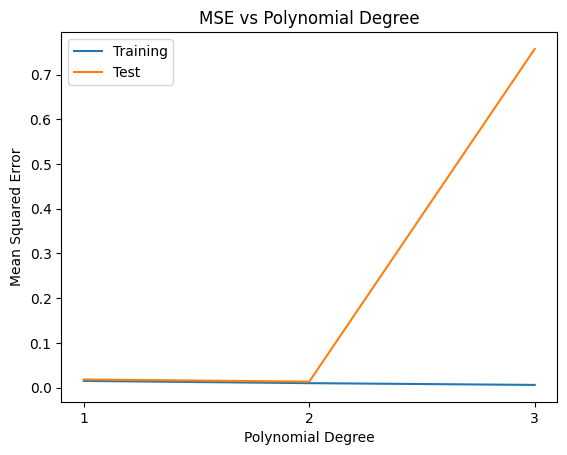

In [ ]:
plt.figure()
plt.title('MSE vs Polynomial Degree')
plt.plot(range(1, 4), mse_training_list[0:3], label='Training')
plt.plot(range(1, 4), mse_test_list[0:3], label='Test')

plt.xticks(range(1, 4))

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


Rebuild the Model for Polynomial Degree 2

In [ ]:
poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.fit_transform(x_test_scaled)

poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly, y_train_scaled)

yhat_train = poly_reg_model.predict(x_train_poly)
yhat_test = poly_reg_model.predict(x_test_poly)

ground_truth = y_train_scaled[0]
print("Ground Truth Train: ", ground_truth)

predicted = yhat_train[0]
print("Predicted Train: ", predicted)


ground_truth = y_test_scaled[0]
print("Ground Truth Test: ", ground_truth)

predicted = yhat_test[0]
print("Predicted Test: ", predicted)

Ground Truth Train:  [0.15607424]
Predicted Train:  [0.11244413]
Ground Truth Test:  [0.12053708]
Predicted Test:  [0.17822769]


Above is an exmaple opf our ground truth and predictions for our training and testing dataset with a 2nd degree polynomial regression model.

### Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?

After plotting our fitting graph, we notice that the training MSE decreases as the polynomial degree increases. However, the testing MSE decreases from degree 1 to degree 2 and increases from degree 2 onwards. After degree 2, our model shows signs of overfitting. Therefore, we believe a second degree polynomial model fits our dataset the best.

For our next model, we are thinking about using a decision tree. Many of our features can be easily split by placing thresholds. For example, the temperature of the day. Our decision tree leaf nodes would be the amount of bikes being rented out on a given day.

### What is the conclusion of your 1st model? What can be done to possibly improve it?

For our first model, we think the MSE is acceptable. We picked a good complexity for our polynomial model based on the fitting graph. We picked the optimal degree to avoid overfitting. To improve our model, we can use graident descent to optimize the weights in our model. We can also use k-fold cross validation and feature expansion to improve upon our current model.